<a href="https://colab.research.google.com/github/heleownae/DA_Insurance_PJT/blob/main/4_23_%EC%83%9D%EB%B3%B4_%EC%A7%80%EA%B8%89O_%EC%A7%80%EA%B8%89X_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import koreanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity


pd.set_option('display.max_columns', None)
# fin = pd.read_csv('final_enco_업권분류.csv')

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/최종프/파생변수폴더/final_enco_업권분류_파생변수.csv')

In [4]:
display(df)
print(df.columns)

,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,5.0,0.0,3.0,0.00,0.60,0.0,100.0
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4.0,3.0,0.0,0.75,0.00,0.0,100.0
2,2,1659127,5420542,2,4,7,1,5,180,2,3,180.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,8.0,3.0,1.0,0.38,0.12,4.0,100.0
3,3,817293,5884271,1,4,6,4,7,110,1,0,110.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,3.0,0.0,3.0,0.00,1.00,0.0,100.0
4,4,798115,6197631,1,5,3,1,1,50,2,20,50.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,7.0,2.0,0.0,0.29,0.00,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57480,58421,1885935,9350920,1,2,6,4,2,170,1,0,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,2.0,0.0,0.0,0.00,0.00,1.0,100.0
57481,58423,1898196,5285028,1,2,6,2,99,1,1,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,5.0,1.0,0.0,0.20,0.00,1.0,0.0
57482,58424,1942749,6650657,1,2,6,4,7,6,1,0,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,6.0,2.0,0.0,0.33,0.00,0.0,100.0
57483,58425,1946706,8536828,2,5,6,4,7,8,1,0,8.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1.0,0.0,0.0,0.00,0.00,1.0,100.0


Index(['Unnamed: 0', 'JOIN_SN', 'POL_SN', 'GENDER', 'AGE_GROUP',
       'reduce_GBN_CD', 'reduce_STAT_CD', 'CT_CHNL_CD', 'CT_PY_AMT',
       'CT_PY_CYCLE_CD', 'CT_PY_PD', 'mean_AMT', 'GBN_CD_1', 'GBN_CD_2',
       'GBN_CD_3', 'GBN_CD_4', '총지급금액', '총지급 건수', '기타', '배책', '사망/후유', '수술/입원',
       '실손', '자동차', '진단/통원', '화재/재물', '연령대_0', '연령대_1', '연령대_2', '연령대_3',
       '연령대_4', '연령대_5', '연령대_6', '연령대_7', '연령대_8', '보험종류_1', '보험종류_2',
       '보험종류_3', '보험종류_4', '보험종류_5', '보험종류_6', '보험종류_7', '보험종류_8', '보험종류_9',
       '보험상태_1', '보험상태_2', '보험상태_3', '보험상태_4', '채널_1', '채널_2', '채널_3', '채널_4',
       '채널_5', '채널_6', '채널_7', '채널_99', '납입주기_1', '납입주기_2', '납입주기_3',
       '납입주기_99', '성별_1', '성별_2', '업권', '보험계약건수', '해지건수', '만기건수', '해지율', '만기율',
       '청구건수', '계약유지율'],
      dtype='object')


In [5]:
df2 = df[df['업권']==2]

In [6]:
df2

,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,5.0,0.0,3.0,0.00,0.60,0.0,100.0
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4.0,3.0,0.0,0.75,0.00,0.0,100.0
9,9,657563,5707253,1,4,2,1,6,18,2,10,18.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,12.0,3.0,1.0,0.25,0.08,5.0,100.0
16,17,714478,6142305,1,7,2,1,6,17,2,10,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,8.0,1.0,4.0,0.12,0.50,0.0,100.0
19,20,575660,9524605,1,5,2,1,4,1300,2,20,1300.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2,17.0,1.0,1.0,0.06,0.06,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,58233,1744456,2296853,1,3,2,1,1,210,2,38,210.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,13.0,6.0,0.0,0.46,0.00,0.0,100.0
57306,58235,311504,2866410,2,2,1,1,1,59,2,20,59.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,6.0,0.0,2.0,0.00,0.33,0.0,100.0
57307,58236,94045,3631343,2,4,2,1,3,47,2,20,47.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2,15.0,7.0,0.0,0.47,0.00,0.0,100.0
57314,58243,44716,6450867,2,5,7,2,4,90,2,10,90.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,5.0,1.0,0.0,0.20,0.00,2.0,100.0


In [7]:
df2['총지급금액'].value_counts()

총지급금액
0        20191
360         31
120         29
330         23
160         23
         ...  
7642         1
15310        1
155          1
594          1
1316         1
Name: count, Length: 612, dtype: int64

# 지급금액 기준으로 O/X  데이터프레임 생성

In [8]:
#지급금액 기준으로 O/X  데이터프레임 생성
df2_payO = df2[df2['총지급금액']>0]
df2_payX = df2[df2['총지급금액']==0]
display(df2_payO)
display(df2_payX)

,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
278,284,1032188,4733018,2,6,2,1,6,49,2,10,49.000000,1,0,1,0,270,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2,7.0,2.0,3.0,0.29,0.43,1.0,100.0
317,323,1519986,9953393,1,4,2,1,2,160,2,27,160.000000,1,1,1,1,123,2,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,2,1.0,0.0,0.0,0.00,0.00,2.0,100.0
379,386,1023137,7940086,2,4,1,1,4,91,2,20,83.333333,1,0,0,0,349,3,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,1.0,0.0,0.0,0.00,0.00,3.0,100.0
427,435,1863244,9403484,1,4,1,1,1,400,2,10,395.000000,1,1,1,0,96,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,10.0,3.0,2.0,0.30,0.20,1.0,100.0
462,470,618652,1807124,2,4,2,1,1,140,2,20,140.000000,1,1,1,0,380,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,3.0,0.0,1.0,0.00,0.33,3.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57167,58096,112936,8619730,2,5,2,1,1,90,2,20,82.666667,1,1,1,1,320,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,8.0,0.0,2.0,0.00,0.25,3.0,100.0
57252,58181,883760,618014,2,4,1,1,1,83,2,20,83.000000,1,1,1,0,170,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,12.0,3.0,1.0,0.25,0.08,4.0,100.0
57271,58200,660869,881350,2,6,2,1,1,84,2,10,102.000000,1,1,1,0,10600,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,10.0,0.0,1.0,0.00,0.10,2.0,100.0
57275,58204,1397810,5343191,2,6,3,1,1,81,2,10,81.000000,1,0,1,0,1428,7,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,5.0,2.0,0.0,0.40,0.00,8.0,100.0


,Unnamed: 0,JOIN_SN,POL_SN,GENDER,AGE_GROUP,reduce_GBN_CD,reduce_STAT_CD,CT_CHNL_CD,CT_PY_AMT,CT_PY_CYCLE_CD,CT_PY_PD,mean_AMT,GBN_CD_1,GBN_CD_2,GBN_CD_3,GBN_CD_4,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물,연령대_0,연령대_1,연령대_2,연령대_3,연령대_4,연령대_5,연령대_6,연령대_7,연령대_8,보험종류_1,보험종류_2,보험종류_3,보험종류_4,보험종류_5,보험종류_6,보험종류_7,보험종류_8,보험종류_9,보험상태_1,보험상태_2,보험상태_3,보험상태_4,채널_1,채널_2,채널_3,채널_4,채널_5,채널_6,채널_7,채널_99,납입주기_1,납입주기_2,납입주기_3,납입주기_99,성별_1,성별_2,업권,보험계약건수,해지건수,만기건수,해지율,만기율,청구건수,계약유지율
0,0,15110,2197182,2,2,7,1,4,5000,1,0,5000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,5.0,0.0,3.0,0.00,0.60,0.0,100.0
1,1,56423,254040,2,2,1,1,1,170,2,5,170.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,4.0,3.0,0.0,0.75,0.00,0.0,100.0
9,9,657563,5707253,1,4,2,1,6,18,2,10,18.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,12.0,3.0,1.0,0.25,0.08,5.0,100.0
16,17,714478,6142305,1,7,2,1,6,17,2,10,17.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,2,8.0,1.0,4.0,0.12,0.50,0.0,100.0
19,20,575660,9524605,1,5,2,1,4,1300,2,20,1300.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,2,17.0,1.0,1.0,0.06,0.06,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,58233,1744456,2296853,1,3,2,1,1,210,2,38,210.0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,2,13.0,6.0,0.0,0.46,0.00,0.0,100.0
57306,58235,311504,2866410,2,2,1,1,1,59,2,20,59.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,6.0,0.0,2.0,0.00,0.33,0.0,100.0
57307,58236,94045,3631343,2,4,2,1,3,47,2,20,47.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2,15.0,7.0,0.0,0.47,0.00,0.0,100.0
57314,58243,44716,6450867,2,5,7,2,4,90,2,10,90.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,5.0,1.0,0.0,0.20,0.00,2.0,100.0


# 지급 O/ 지급 X의  분석용 데이터 프레임생성

In [9]:
# 지급 O/ 지급 X의  분석용 데이터 프레임생성
df2_payO_drop = df2_payO[['GENDER','AGE_GROUP','reduce_GBN_CD','CT_PY_CYCLE_CD','CT_PY_PD','mean_AMT','CT_CHNL_CD','GBN_CD_1','GBN_CD_2',	'GBN_CD_3','GBN_CD_4',
                           '보험계약건수', '해지율', '만기율', '청구건수', '계약유지율',
                          '총지급금액','총지급 건수','기타','배책','사망/후유',	'수술/입원','실손',	'자동차'	,'진단/통원'	,'화재/재물']]

df2_payX_drop = df2_payX[['GENDER','AGE_GROUP','reduce_GBN_CD','CT_PY_CYCLE_CD','CT_PY_PD','mean_AMT','CT_CHNL_CD','GBN_CD_1','GBN_CD_2',	'GBN_CD_3','GBN_CD_4',
                           '보험계약건수', '해지율', '만기율', '청구건수', '계약유지율']]

#지급 o - 코사인 유사도 돌리기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


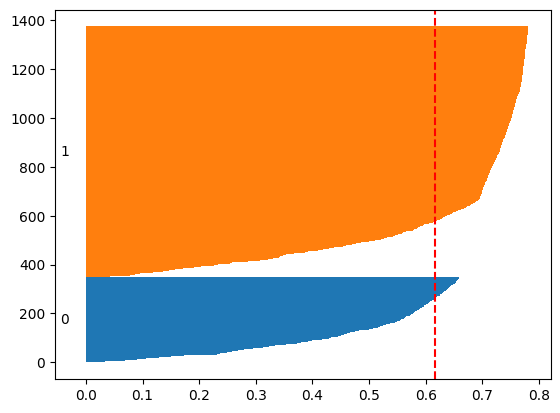

In [14]:
cosine_sim_only_O = cosine_similarity(df2_payO_drop)

k=2

fig, ax = plt.subplots(1, 1)
kmeans_O = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_O)
silhouette_vals = silhouette_samples(cosine_sim_only_O, kmeans_O.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_O.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_O.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


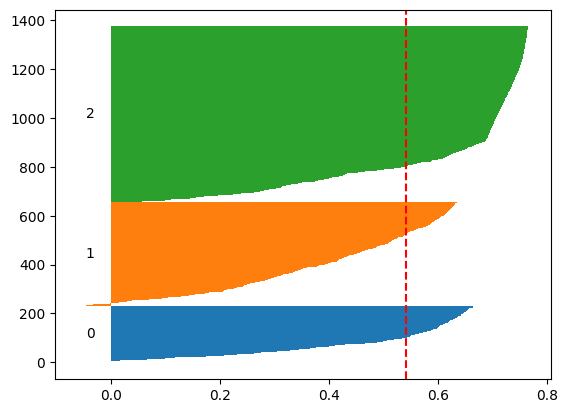

In [10]:
cosine_sim_only_O = cosine_similarity(df2_payO_drop)

k=3

fig, ax = plt.subplots(1, 1)
kmeans_O = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_O)
silhouette_vals = silhouette_samples(cosine_sim_only_O, kmeans_O.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_O.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_O.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

In [12]:
df2_payO['코사인군집'] = kmeans_O.labels_
# df_anl_0drop = df_anl_0.drop(columns='군집')
df2_payO.to_csv('생보 코사인 지급 O.csv', index=False)


<ipython-input-12-2a5012170591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_payO['코사인군집'] = kmeans_O.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


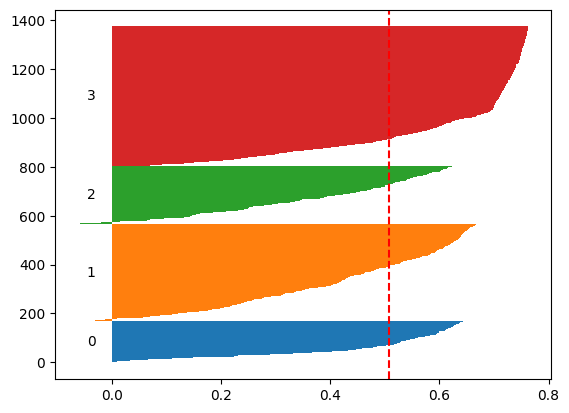

In [15]:
cosine_sim_only_O = cosine_similarity(df2_payO_drop)

k=4

fig, ax = plt.subplots(1, 1)
kmeans_O = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_O)
silhouette_vals = silhouette_samples(cosine_sim_only_O, kmeans_O.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_O.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_O.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


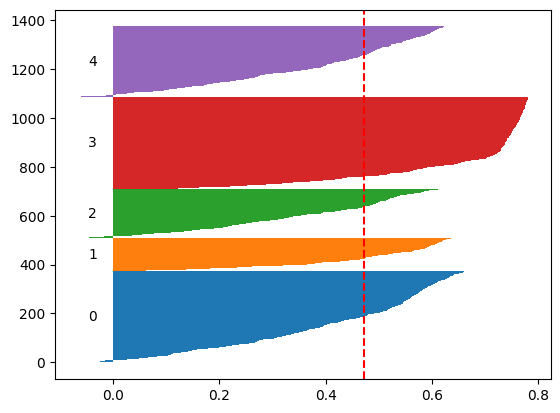

In [11]:
cosine_sim_only_O = cosine_similarity(df2_payO_drop)

k=5

fig, ax = plt.subplots(1, 1)
kmeans_O = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_O)
silhouette_vals = silhouette_samples(cosine_sim_only_O, kmeans_O.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_O.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_O.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


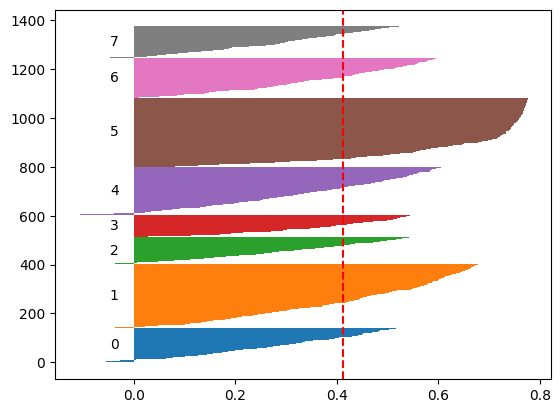

In [13]:
cosine_sim_only_O = cosine_similarity(df2_payO_drop)

k=8

fig, ax = plt.subplots(1, 1)
kmeans_O = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_O)
silhouette_vals = silhouette_samples(cosine_sim_only_O, kmeans_O.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_O.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_O.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

# 지급 X  - 코사인 유사도 돌리기

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


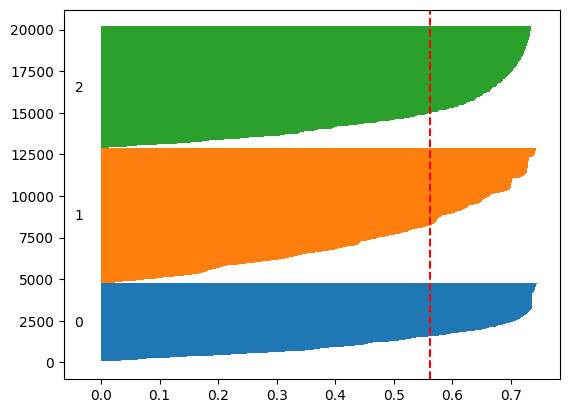

In [10]:
cosine_sim_only_X = cosine_similarity(df2_payX_drop)

k=3

fig, ax = plt.subplots(1, 1)
kmeans_X = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_X)
silhouette_vals = silhouette_samples(cosine_sim_only_X, kmeans_X.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_X.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_X.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")

In [12]:
df2_payX['코사인군집'] = kmeans_X.labels_
# df_anl_0drop = df_anl_0.drop(columns='군집')
df2_payX.to_csv('생보 코사인 지급 X.csv', index=False)

<ipython-input-12-d78b5c9ea2f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_payX['코사인군집'] = kmeans_X.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


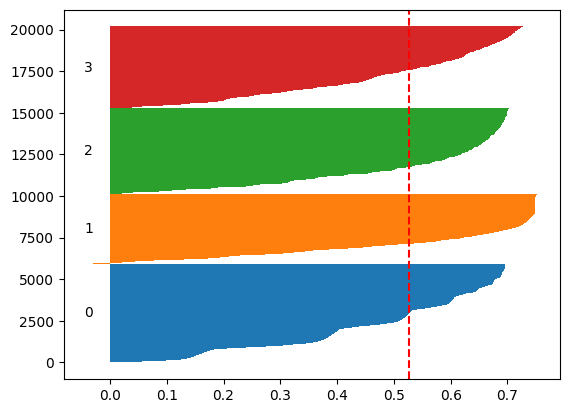

In [10]:
cosine_sim_only_X4 = cosine_similarity(df2_payX_drop)

k=4

fig, ax = plt.subplots(1, 1)
kmeans_X4 = KMeans(n_clusters=k, random_state=42).fit(cosine_sim_only_X4)
silhouette_vals = silhouette_samples(cosine_sim_only_X4, kmeans_X4.labels_)
y_ticks = []
y_lower = y_upper = 0

for c_num in np.unique(kmeans_X4.labels_):
    cluster_silhouette_vals = silhouette_vals[kmeans_X4.labels_==c_num]
    y_upper += len(cluster_silhouette_vals)
    cluster_silhouette_vals.sort()

    ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    ax.text(-0.03, (y_lower + y_upper) / 2, str(c_num), ha='right', va='center')
    y_lower += len(cluster_silhouette_vals)

ax.axvline(np.mean(silhouette_vals), color="red", linestyle="--")